                                 持买仓量
date       variety 持买仓量期货公司          
2018-10-22 A       永安期货        7337.0
           AG      永安期货       12358.0
           AL      永安期货        9945.0
           AP      永安期货        4755.0
           AU      永安期货        3237.0
           B       永安期货        1339.0
           BU      永安期货       36355.0
           C       永安期货       25830.0
           CF      永安期货       17115.0
           CS      永安期货        4092.0
           CU      永安期货        9853.0
           CY      永安期货           8.0
           FG      永安期货       17941.0
           FU      永安期货        4139.0
           HC      永安期货       38061.0
           I       永安期货        9483.0
           IC      永安期货         999.0
           IF      永安期货        1993.0
           IH      永安期货         403.0
           J       永安期货        8508.0
           JD      永安期货        5644.0
           JM      永安期货       12420.0
           JR      永安期货          30.0
           L       永安期货       29558.0
           M

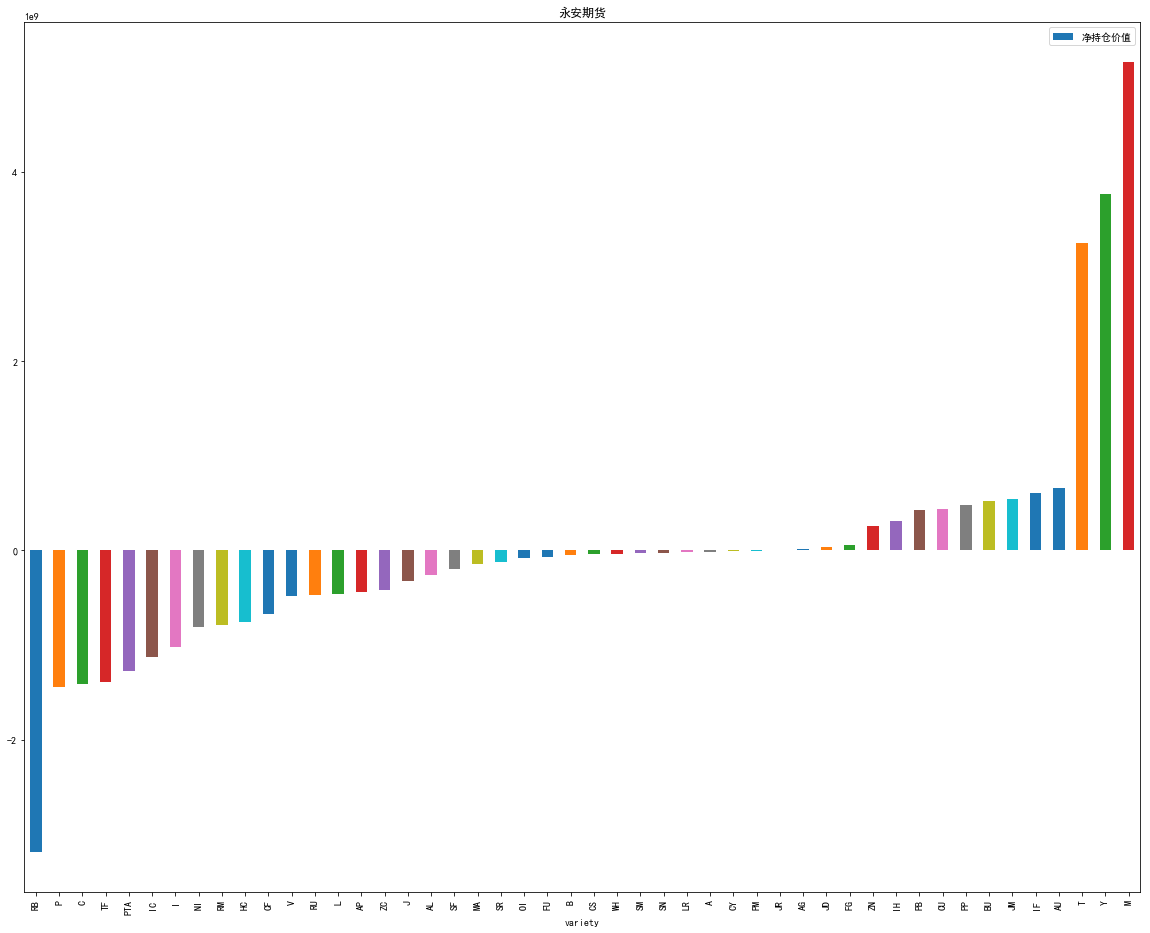

In [18]:
import pymongo
import pandas as pd
import matplotlib as plt
from pandas import Series,DataFrame
pd.set_option('display.width', None)  # 设置字符显示宽度
pd.set_option('display.max_rows', None)  # 设置显示最大行
pd.set_option('display.max_columns', None)  # 设置显示最大行
from locale import *
import re

setlocale(LC_NUMERIC, 'English_US')

atof('123,456')    # 123456.0

#连接数据库
client = pymongo.MongoClient('localhost',27017)
futures = client.futures


market = futures.market
unit = futures.unit
position = futures.position
#加载数据
market = DataFrame(list(market.find()))
unit = DataFrame(list(unit.find()))
position = DataFrame(list(position.find()))


# #类型转换
# market['set_close'] = market['set_close'].astype(float)
# unit['unit'] = unit['unit'].astype(float)

#大写字母
position['variety']=position['variety'].str.upper()

#删除/选取某行含有特殊数值的列
position=position.set_index('名次')

#选择需要显示的字段
data1=market[['date','variety','set_close']]

data2=unit[[ 'variety','unit']]
position=position[['date','variety','symbol','持买仓量期货公司','持买仓量', '持买仓量增减','持卖仓量期货公司','持卖仓量', '持卖仓量增减']]
# print(position.head())

#查询会员
members='永安期货'
data3=position[(position['持买仓量期货公司'] == members)]
#汇总合约
data3=data3[['date','variety','持买仓量期货公司','持买仓量']]
data3=data3.groupby(['date','variety','持买仓量期货公司'])[['持买仓量']].sum()
data4=position[(position['持卖仓量期货公司'] == members)]
# print(data4.head())
data4=data4[['date','variety','持卖仓量期货公司','持卖仓量']]
data4=data4.groupby(['date','variety','持卖仓量期货公司'])[['持卖仓量']].sum()
print(data3)
print(data4)
#并集
data5=pd.merge(data3,data4, on=['date','variety'],how='outer')
data5['会员简称']=data5.apply(lambda x: members,axis=1)
#nan缺失值填充fillna()为0
data5=data5.fillna(0)
data5['净持仓']=data5.apply(lambda x: x['持买仓量']-x['持卖仓量'],axis=1)
#选择需要显示的字段
data5=data5[['会员简称','持买仓量','持卖仓量','净持仓']]
data5=data5.reset_index(['variety','date'])
print(data5)

#合约价值
contractValue=pd.merge(data1,data2,how='left',sort=False).drop_duplicates()
contractValue['contractValue'] = contractValue.apply(lambda x: x['set_close']*x['unit'],axis=1)
contractValue=contractValue[['date','variety','contractValue']]
#值替换replace()
contractValue=contractValue.replace(['TA'],'PTA')
print(contractValue)
# contractValue.set_index(['date','variety'], inplace = True)
sz=pd.merge(data5,contractValue,on=['date','variety'],how='left')
#净持仓价值
sz['净持仓价值']=sz.apply(lambda x: x['净持仓']*x['contractValue'],axis=1)
sz=sz[['variety','净持仓价值']]
sz=sz.sort_values(by='净持仓价值')
print(sz)
# sz=sz.set_index('variety')
sz.plot.bar(x='variety',y='净持仓价值',figsize=(20,16),title=members)
#二行即可搞定画图中文乱码
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
# print(hb)
# hb=hb[['date','variety','closunit']]
# data3 = position.merge(hb)
# data3['持买仓量']=data3.apply(lambda  x: x['持买仓量']*x['closeunit'],axis=1)
# data3['持卖仓量']=data3.apply(lambda  x: x['持卖仓量']*x['closeunit'],axis=1)
# print(data3.head())
#
# df = data3[(data3['持买仓量期货公司'] == '永安期货') & (data3['持卖仓量期货公司'] == '永安期货')]
# df['净持仓1']=df.apply(lambda x: x['持买仓量']-x['持卖仓量'],axis=1)
# print(df[['date','variety','持买仓量期货公司','持卖仓量期货公司','净持仓1']])
# print(data3.groupby(['date','variety'])[['持买仓量','持卖仓量']].sum())
# print(df)

http://www.shfe.com.cn/data/dailydata/kx/kx20180718.dat HTTP Error 403: Forbidden


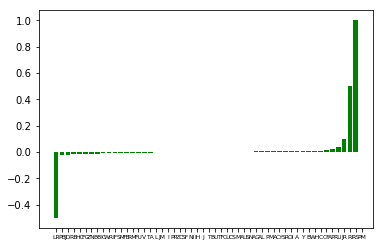

,ry
LR,-0.500000
PB,-0.025729
JD,-0.025646
RB,-0.018274
HC,-0.016274
FG,-0.014746
ZN,-0.013752
BB,-0.013647
IC,-0.009400
WR,-0.008608


In [3]:
import fushare as fushare
fushare.get_rollYield_bar(type = 'var', date = '20180718',plot = True)

In [6]:
fushare.get_rank_sum(date = '20181105', vars = ['CF']) 

D:\Anaconda36\lib\site-packages\pandas\io\parsers.py:782: FutureWarning: The 'tupleize_cols' argument has been deprecated and will be removed in a future version. Column tuples will then always be converted to MultiIndex.


  self.options, self.engine = self._clean_options(options, engine)
D:\Anaconda36\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
D:\Anaconda36\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  

,symbol,var,vol_top5,vol_chg_top5,long_openIntr_top5,long_openIntr_chg_top5,short_openIntr_top5,short_openIntr_chg_top5,vol_top10,vol_chg_top10,...,long_openIntr_chg_top15,short_openIntr_top15,short_openIntr_chg_top15,vol_top20,vol_chg_top20,long_openIntr_top20,long_openIntr_chg_top20,short_openIntr_top20,short_openIntr_chg_top20,date
0,CF,CF,52888,-75857,84865,1109,98835,-960,78662,-121354,...,-646,207387,1678,107296,-161507,202961,-505,236944,-438,20181105
1,CF811,CF,105,20,1471,-25,1840,-17,114,-206,...,-33,1910,-17,114,-206,1910,-33,1910,-17,20181105
2,CF901,CF,38625,-42188,40853,304,59685,-1427,55264,-65881,...,-1454,110321,-2401,76449,-98875,103849,-2870,122157,-2315,20181105
3,CF905,CF,16933,-36269,47771,174,56604,297,24048,-47348,...,506,106350,1624,32614,-61733,97675,584,117668,1579,20181105
4,CF909,CF,1920,-1111,9545,232,7950,-463,2593,-1463,...,246,13461,-536,3093,-1801,13933,240,14516,-526,20181105


20180618非交易日
http://www.shfe.com.cn/data/dailydata/kx/kx20180619.dat HTTP Error 403: Forbidden
http://www.shfe.com.cn/data/dailydata/kx/kx20180620.dat HTTP Error 403: Forbidden
http://www.shfe.com.cn/data/dailydata/kx/kx20180621.dat HTTP Error 403: Forbidden
http://www.shfe.com.cn/data/dailydata/kx/kx20180622.dat HTTP Error 403: Forbidden
20180623非交易日
20180624非交易日
http://www.shfe.com.cn/data/dailydata/kx/kx20180625.dat HTTP Error 403: Forbidden
http://www.shfe.com.cn/data/dailydata/kx/kx20180626.dat HTTP Error 403: Forbidden
http://www.shfe.com.cn/data/dailydata/kx/kx20180627.dat HTTP Error 403: Forbidden
http://www.shfe.com.cn/data/dailydata/kx/kx20180628.dat HTTP Error 403: Forbidden
http://www.shfe.com.cn/data/dailydata/kx/kx20180629.dat HTTP Error 403: Forbidden
20180630非交易日
20180701非交易日
http://www.shfe.com.cn/data/dailydata/kx/kx20180702.dat HTTP Error 403: Forbidden
http://www.shfe.com.cn/data/dailydata/kx/kx20180703.dat HTTP Error 403: Forbidden
http://www.shfe.com.cn/data/daily

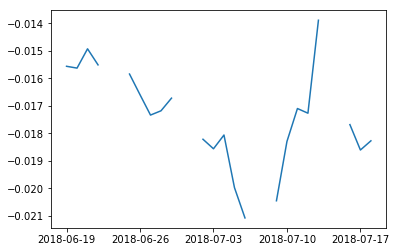

,ry
2018-06-18,NaN
2018-06-19,-0.015566
2018-06-20,-0.015632
2018-06-21,-0.014931
2018-06-22,-0.015514
2018-06-23,NaN
2018-06-24,NaN
2018-06-25,-0.015847
2018-06-26,-0.016599
2018-06-27,-0.017338


In [5]:
import fushare as fushare
fushare.get_rollYield_bar(type = 'date', start = '20180618', end = '20180718',plot = True)